<a href="https://colab.research.google.com/github/osadose/osadose/blob/main/MHP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
!pip install saspy
import saspy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 46.9 MB/s eta 0:00:00


Importing and manipulating the Dataset

In [ ]:
data = pd.read_sas(r'/content/drive/MyDrive/BRFSS dataset/LLCP2022.XPT ', format='xport')
data.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_SMOKGRP,_LCSREC,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4
0,1.0,1.0,b'02032022',b'02',b'03',b'2022',1100.0,b'2022000001',2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,2.0,2.0
1,1.0,1.0,b'02042022',b'02',b'04',b'2022',1100.0,b'2022000002',2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,2.0,2.0,2.0
2,1.0,1.0,b'02022022',b'02',b'02',b'2022',1100.0,b'2022000003',2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,2.0
3,1.0,1.0,b'02032022',b'02',b'03',b'2022',1100.0,b'2022000004',2.022000e+09,1.0,...,3.0,2.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,9.0,9.0,2.0
4,1.0,1.0,b'02022022',b'02',b'02',b'2022',1100.0,b'2022000005',2.022000e+09,1.0,...,4.0,NaN,1.0,1.000000e+01,1.0,1.400000e+02,1.0,NaN,NaN,2.0


In [ ]:
data.shape

(445132, 328)

In [ ]:
pd.set_option('display.max_columns', 50)

MHPD=data[['_STATE', '_SEX', '_AGE_G', '_BMI5CAT', 'MARITAL', 'CHILDREN', '_EDUCAG', '_INCOMG1', 'EMPLOY1', 'RENTHOM1',
           'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'ADDEPEV3', 'POORHLTH', 'CHECKUP1', 'ACEDEPRS', 'CAREGIV1', 'RRCLASS3',
           'SLEPTIM1', '_RFHLTH', '_RFDRHV8', '_HLTHPLN', 'MEDCOST1', '_SMOKER3', 'DRNKANY6', '_DRNKWK2', 'ALCDAY4', 'ACEDRINK',
           'EXERANY2', 'DECIDE', 'BLIND', 'DIFFWALK', 'DIABETE4', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNC1', 'CSRVTRT3',
           'CHCCOPD3', 'CHCKDNY2', 'HAVARTH4', '_HCVU652', 'VETERAN3', 'MARIJAN1', 'CIMEMLOS', 'LSATISFY', 'EMTSUPRT', 'FIREARM5']]

MHPD.shape

(445132, 48)

In [ ]:
MHPD.dtypes

,0
_STATE,float64
_SEX,float64
_AGE_G,float64
_BMI5CAT,float64
MARITAL,float64
CHILDREN,float64
_EDUCAG,float64
_INCOMG1,float64
EMPLOY1,float64
RENTHOM1,float64


In [ ]:
MHPD.isnull().sum()

,0
_STATE,0
_SEX,0
_AGE_G,0
_BMI5CAT,48806
MARITAL,8
CHILDREN,9312
_EDUCAG,0
_INCOMG1,0
EMPLOY1,6196
RENTHOM1,9


In [ ]:
MHPD.describe()

,_STATE,_SEX,_AGE_G,_BMI5CAT,MARITAL,CHILDREN,_EDUCAG,_INCOMG1,EMPLOY1,RENTHOM1,GENHLTH,PHYSHLTH,MENTHLTH,ADDEPEV3,POORHLTH,CHECKUP1,ACEDEPRS,CAREGIV1,RRCLASS3,SLEPTIM1,_RFHLTH,_RFDRHV8,_HLTHPLN,MEDCOST1,_SMOKER3,DRNKANY6,_DRNKWK2,ALCDAY4,ACEDRINK,EXERANY2,DECIDE,BLIND,DIFFWALK,DIABETE4,CVDSTRK3,ASTHMA3,CHCSCNC1,CSRVTRT3,CHCCOPD3,CHCKDNY2,HAVARTH4,_HCVU652,VETERAN3,MARIJAN1,CIMEMLOS,LSATISFY,EMTSUPRT,FIREARM5
count,445132.000000,445132.000000,445132.000000,396326.000000,445124.000000,4.358200e+05,445132.000000,445132.000000,438936.000000,445123.000000,445129.000000,445127.000000,445129.000000,445125.000000,255746.000000,445129.000000,48286.000000,98510.000000,161738.000000,445129.000000,445132.000000,445132.000000,445132.000000,445128.000000,445132.000000,445132.000000,4.451320e+05,404369.000000,48231.000000,445130.000000,424146.000000,425277.00000,422977.000000,445129.000000,445130.000000,445130.000000,445130.000000,17302.000000,445130.000000,445130.000000,445129.000000,445132.000000,440959.000000,94919.000000,64675.000000,254488.000000,254141.000000,39800.000000
mean,31.005942,1.529942,4.381817,3.005160,2.418382,6.665297e+01,3.091618,5.411543,3.860800,1.417907,2.580133,59.178589,58.418234,1.829138,51.867849,1.455430,1.990308,1.841184,3.770023,7.912277,1.201284,1.952403,1.373143,1.936409,3.837466,2.243148,1.142494e+04,516.028281,1.899339,1.255566,1.924899,1.96760,1.864002,2.750982,1.975508,1.871307,1.956997,2.819212,1.946292,1.977514,1.691626,4.264456,1.901816,79.351921,1.955748,1.684461,1.958027,2.088492
std,16.652065,0.499103,1.611986,0.835494,1.827092,3.734262e+01,1.041218,2.368884,2.895042,0.925601,1.084509,37.584444,37.835814,0.607915,38.849062,1.134532,1.135251,0.649955,14.347859,8.164575,0.558108,2.509682,1.576053,0.440325,1.753290,2.314231,3.137973e+04,357.738842,1.074484,0.534058,0.600152,0.43896,0.536942,0.756820,0.380928,0.497664,0.521036,1.639220,0.468650,0.414349,0.641802,3.888355,0.513543,23.745502,0.693711,0.914356,1.280953,1.829461
min,1.000000,1.000000,1.000000,1.000000,1.000000,5.397605e-79,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.397605e-79,101.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,18.000000,1.000000,3.000000,2.000000,1.000000,8.800000e+01,2.000000,4.000000,1.000000,1.000000,2.000000,14.000000,14.000000,2.000000,7.000000,1.000000,2.000000,2.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,5.397605e-79,202.000000,2.000000,1.000000,2.000000,2.00000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,88.000000,2.000000,1.000000,1.000000,1.000000
50%,30.000000,2.000000,5.000000,3.000000,1.000000,8.800000e+01,3.000000,5.000000,2.000000,1.000000,3.000000,88.000000,88.000000,2.000000,88.000000,1.000000,2.000000,2.000000,1.000000,7.000000,1.000000,1.000000,1.000000,2.000000,4.000000,2.000000,4.700000e+01,230.000000,2.000000,1.000000,2.000000,2.00000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,88.000000,2.000000,2.000000,2.000000,2.000000
75%,46.000000,2.000000,6.000000,4.000000,4.000000,8.800000e+01,4.000000,7.000000,7.000000,2.000000,3.000000,88.000000,88.000000,2.000000,88.000000,1.000000,2.000000,2.000000,1.000000,8.000000,1.000000,1.000000,1.000000,2.000000,4.000000,2.000000,6.000000e+02,888.000000,2.000000,1.000000,2.000000,2.00000,2.000000,3.000000,2.000000,2.000000,2.000000,5.000000,2.000000,2.000000,2.000000,9.000000,2.000000,88.000000,2.000000,2.000000,2.000000,2.000000
max,78.000000,2.000000,6.000000,4.000000,9.000000,9.900000e+01,9.000000,9.000000,9.000000,9.000000,9.000000,99.000000,99.000000,9.000000,99.000000,9.000000,9.000000,9.000000,99.000000,99.000000,9.000000,9.000000,9.000000,9.

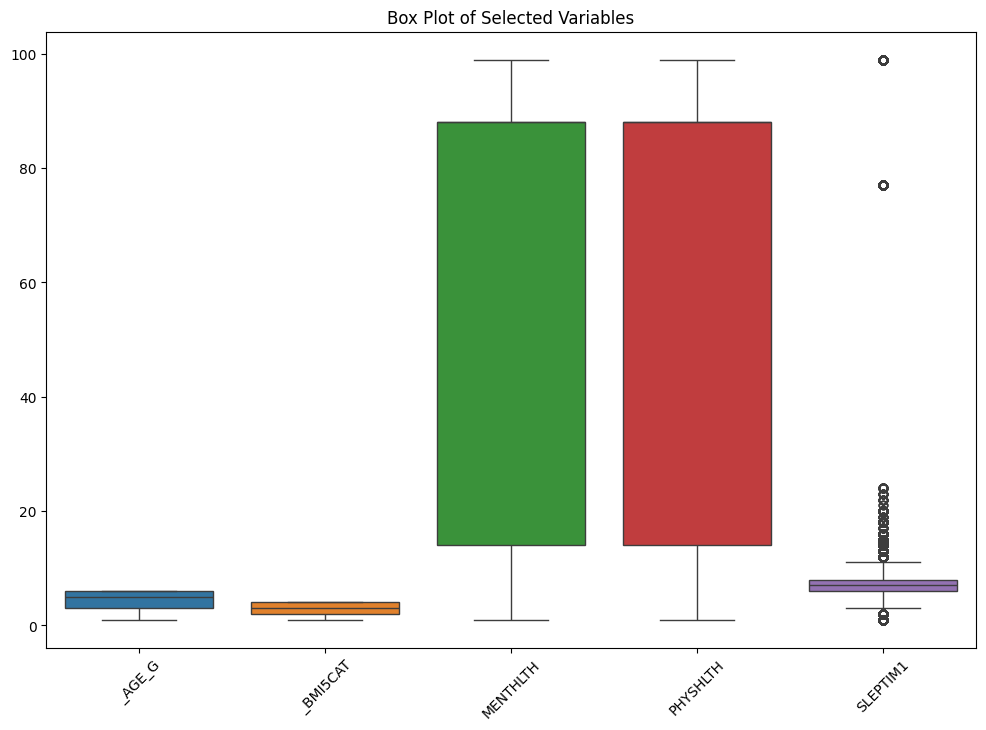

In [ ]:
columns_to_visualize = ['_AGE_G', '_BMI5CAT', 'MENTHLTH', 'PHYSHLTH', 'SLEPTIM1']
plt.figure(figsize=(12, 8))
sns.boxplot(data=MHPD[columns_to_visualize])
plt.xticks(rotation=45)
plt.title('Box Plot of Selected Variables')
plt.show()

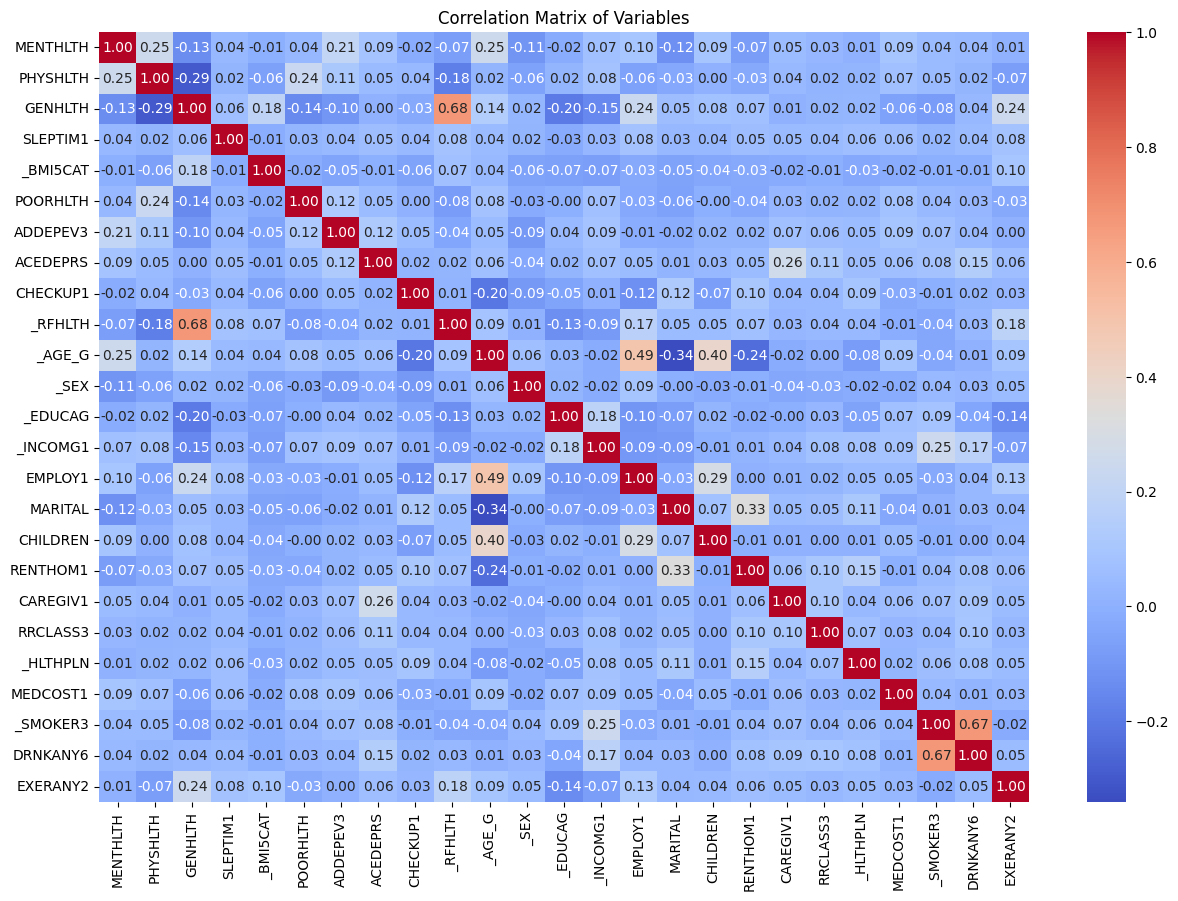

In [ ]:
selected_variables = MHPD[['MENTHLTH', 'PHYSHLTH', 'GENHLTH', 'SLEPTIM1', '_BMI5CAT',
                           'POORHLTH', 'ADDEPEV3', 'ACEDEPRS', 'CHECKUP1', '_RFHLTH',
                           '_AGE_G', '_SEX', '_EDUCAG', '_INCOMG1', 'EMPLOY1',
                           'MARITAL', 'CHILDREN', 'RENTHOM1', 'CAREGIV1', 'RRCLASS3',
                           '_HLTHPLN', 'MEDCOST1', '_SMOKER3', 'DRNKANY6', 'EXERANY2']]

correlation_matrix = selected_variables.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

<ipython-input-10-1179eb5d1850>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MHPD['MENTHLTH'], kde=False, bins=10);


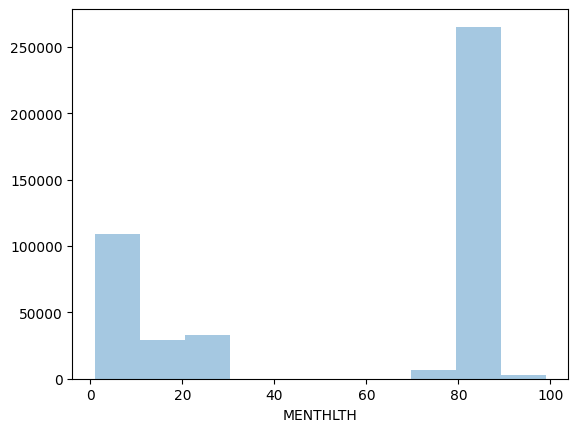

In [ ]:
sns.distplot(MHPD['MENTHLTH'], kde=False, bins=10);

In [ ]:
MHPD['MENTHLTH'].replace(88, 0, inplace=True)
MHPD['MENTHLTH'].replace(77, np.nan, inplace=True)
MHPD['MENTHLTH'].replace(99, np.nan, inplace=True)

<ipython-input-11-72e21ef862ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MHPD['MENTHLTH'].replace(88, 0, inplace=True)
<ipython-input-11-72e21ef862ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MHPD['MENTHLTH'].replace(77, np.nan, inplace=True)
<ipython-input-11-72e21ef862ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MHPD['MENTHLTH'].replace(99, np.nan, inplace=True)


In [ ]:
MHPD['MENTHLTH2']=MHPD['MENTHLTH']

MHPD.loc[MHPD['MENTHLTH2'] < 1, 'MENTHLTH2'] = 0
MHPD.loc[MHPD['MENTHLTH2'] > 0, 'MENTHLTH2'] = 1

<ipython-input-12-043fdeda8072>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MHPD['MENTHLTH2']=MHPD['MENTHLTH']


<ipython-input-13-695c9aacb32f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MHPD['MENTHLTH2'], kde=False, bins=10);


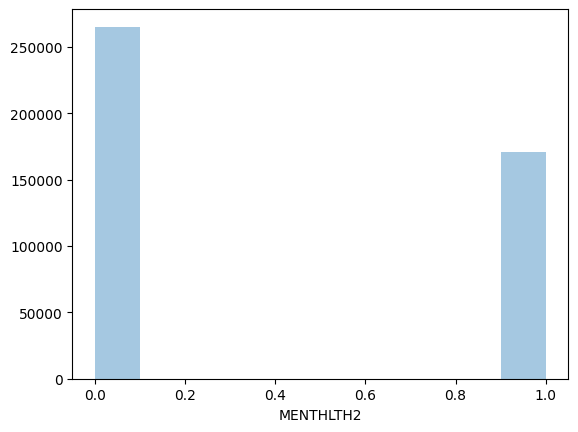

In [ ]:
sns.distplot(MHPD['MENTHLTH2'], kde=False, bins=10);

<Axes: >

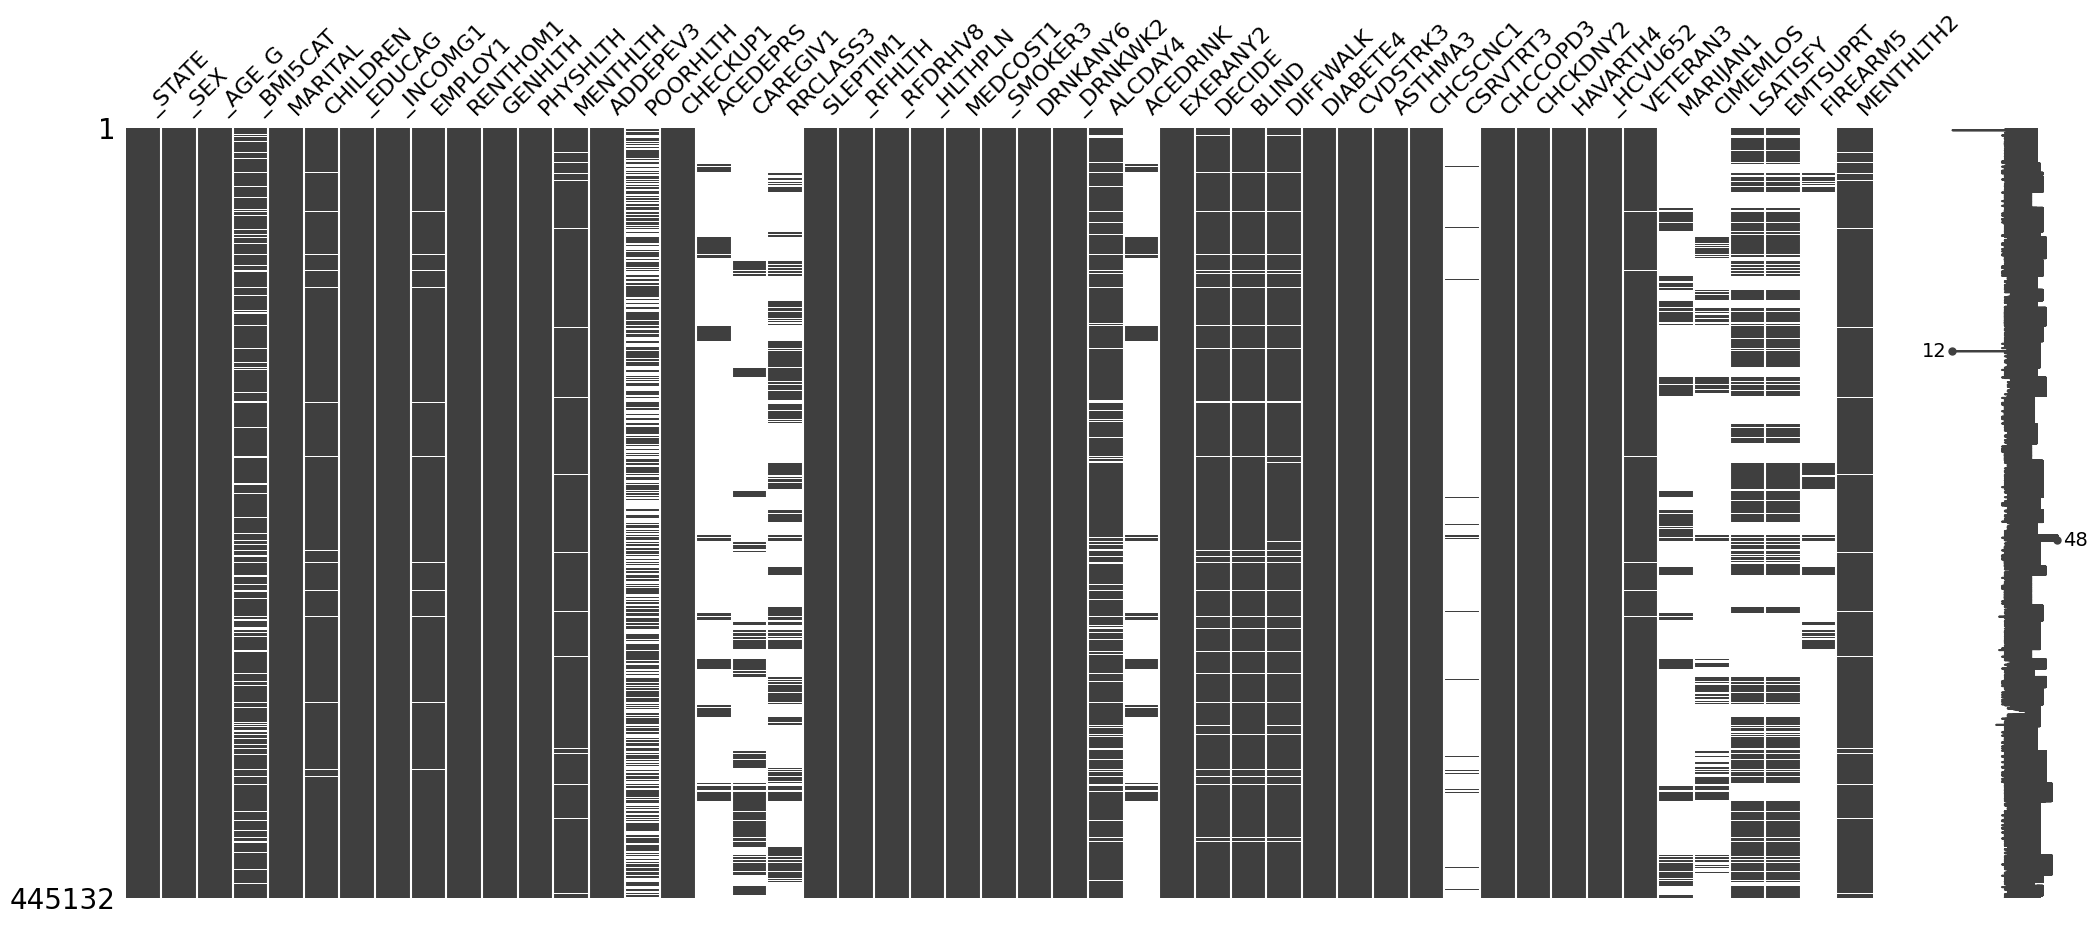

In [ ]:
!pip install missingno
import missingno as msno

msno.matrix(MHPD)

In [ ]:
missing_percentage = MHPD.isnull().sum() / len(MHPD) * 100
threshold = 50
columns_to_drop = missing_percentage[missing_percentage > threshold].index
MHPD1 = MHPD.drop(columns=columns_to_drop)
MHPD1.shape

(445132, 41)

<Axes: >

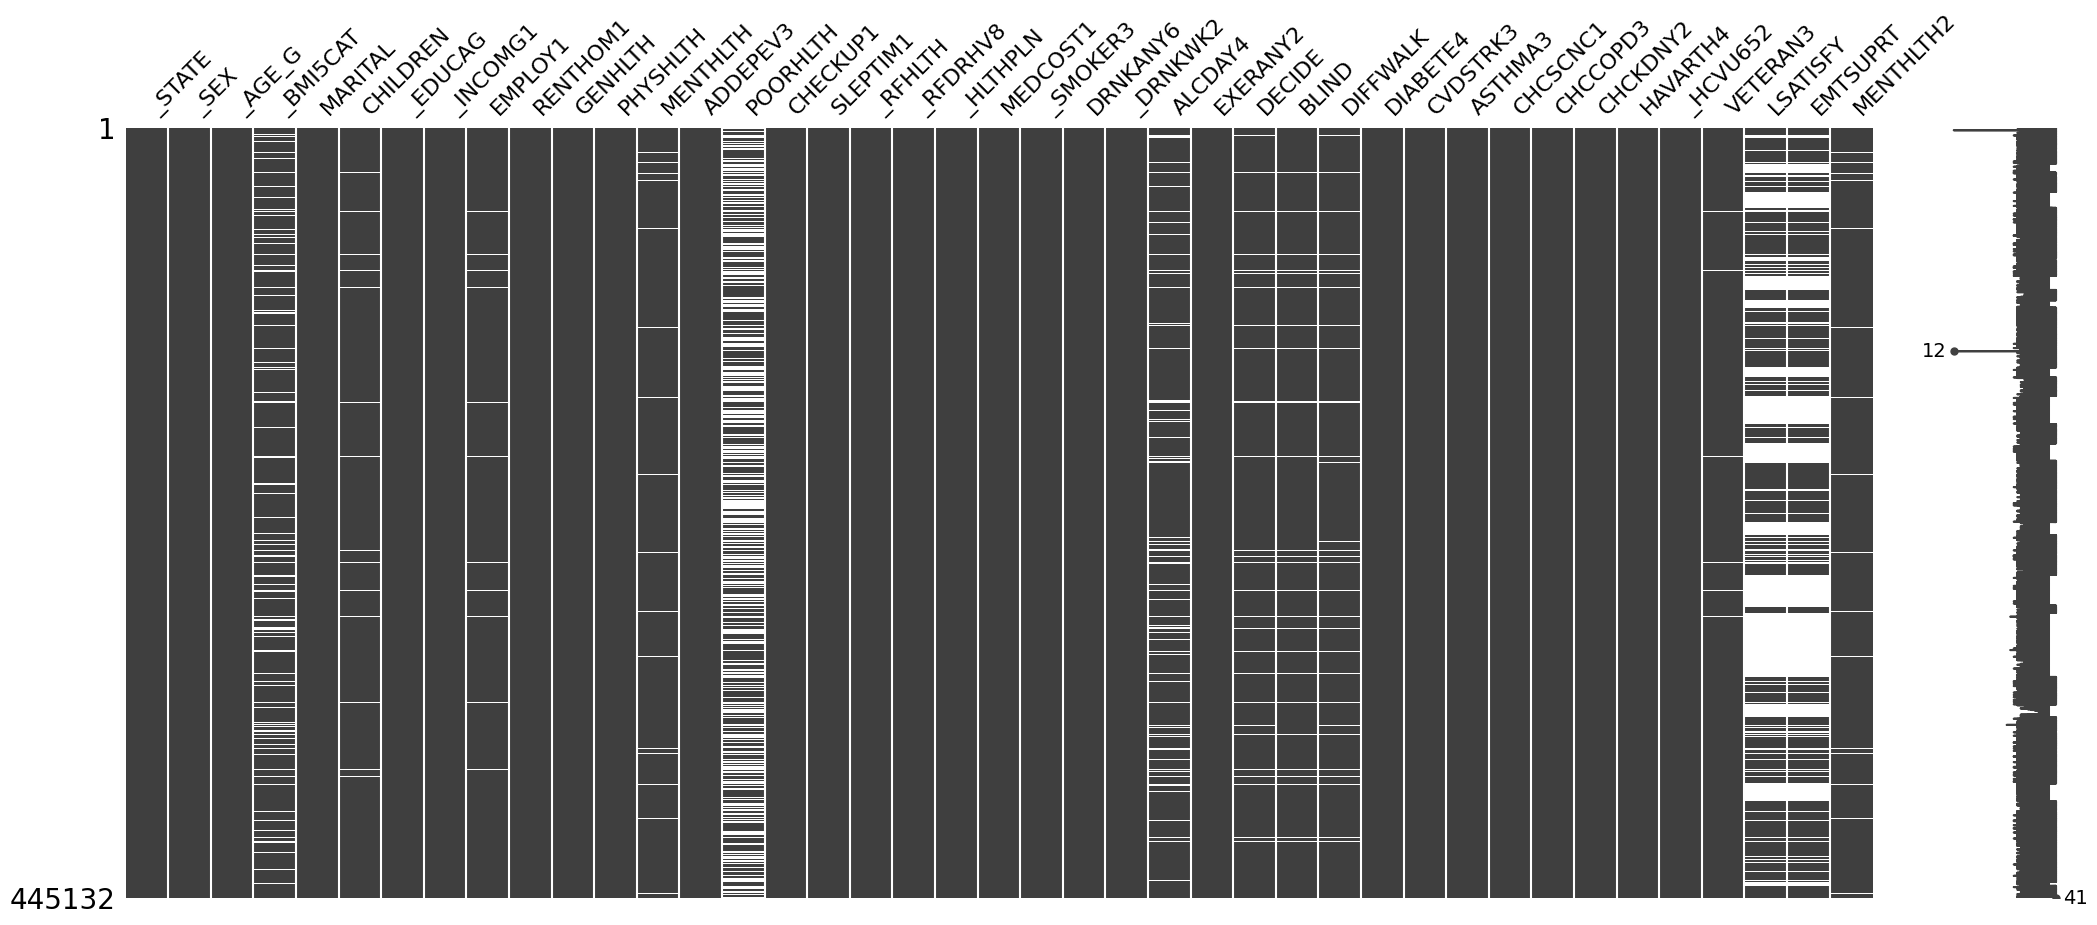

In [ ]:
msno.matrix(MHPD1)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
MHPD2 = pd.DataFrame(imputer.fit_transform(MHPD1), columns=MHPD1.columns)

<Axes: >

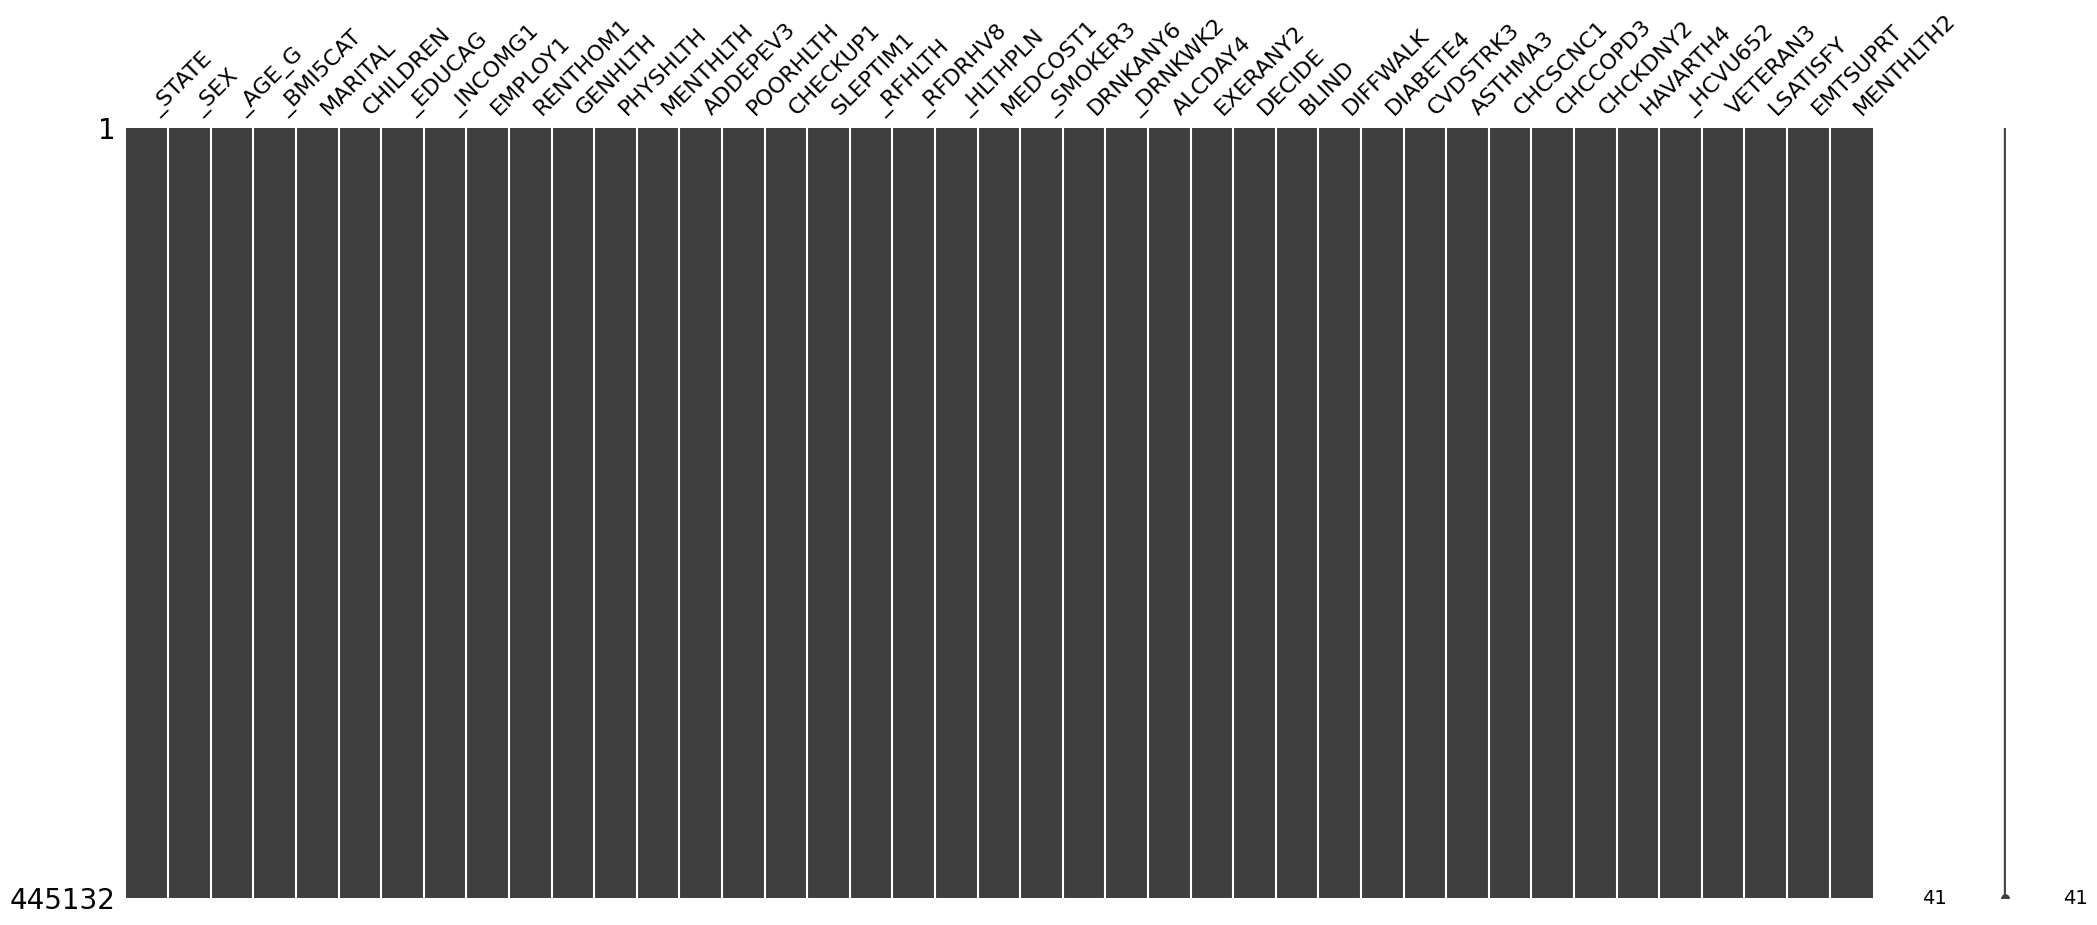

In [ ]:
msno.matrix(MHPD2)

In [ ]:
MHPD2.head()

,_STATE,_SEX,_AGE_G,_BMI5CAT,MARITAL,CHILDREN,_EDUCAG,_INCOMG1,EMPLOY1,RENTHOM1,GENHLTH,PHYSHLTH,MENTHLTH,ADDEPEV3,POORHLTH,CHECKUP1,SLEPTIM1,_RFHLTH,_RFDRHV8,_HLTHPLN,MEDCOST1,_SMOKER3,DRNKANY6,_DRNKWK2,ALCDAY4,EXERANY2,DECIDE,BLIND,DIFFWALK,DIABETE4,CVDSTRK3,ASTHMA3,CHCSCNC1,CHCCOPD3,CHCKDNY2,HAVARTH4,_HCVU652,VETERAN3,LSATISFY,EMTSUPRT,MENTHLTH2
0,1.0,2.0,6.0,3.0,1.0,88.0,4.0,9.0,7.0,1.0,2.0,88.0,0.0,2.0,88.0,1.0,8.0,1.0,1.0,9.0,2.0,4.0,2.0,5.397605e-79,888.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,9.0,2.0,1.0,1.0,0.0
1,1.0,2.0,6.0,3.0,3.0,88.0,2.0,3.0,2.0,1.0,1.0,88.0,0.0,2.0,88.0,8.0,6.0,1.0,1.0,1.0,2.0,4.0,2.0,5.397605e-79,888.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,9.0,2.0,1.0,1.0,0.0
2,1.0,2.0,5.0,3.0,1.0,88.0,4.0,6.0,7.0,1.0,2.0,2.0,3.0,2.0,2.0,1.0,5.0,1.0,1.0,1.0,2.0,4.0,2.0,5.397605e-79,888.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0
3,1.0,2.0,6.0,2.0,1.0,88.0,2.0,9.0,7.0,1.0,1.0,88.0,0.0,2.0,88.0,1.0,7.0,1.0,1.0,9.0,2.0,2.0,2.0,5.397605e-79,888.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0,2.0,1.0,9.0,2.0,1.0,1.0,0.0
4,1.0,2.0,3.0,2.0,1.0,88.0,3.0,3.0,5.0,1.0,4.0,2.0,0.0,2.0,88.0,1.0,9.0,2.0,1.0,1.0,2.0,4.0,1.0,1.400000e+02,203.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,0.0


Logistic Regression

In [ ]:
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [ ]:
X1 = MHPD2[['_STATE', '_SEX', '_AGE_G', '_BMI5CAT', 'MARITAL', 'CHILDREN', '_EDUCAG', '_INCOMG1', 'EMPLOY1', 'RENTHOM1',
           'GENHLTH', 'PHYSHLTH', 'ADDEPEV3', 'POORHLTH', 'CHECKUP1', 'SLEPTIM1', '_RFHLTH', '_RFDRHV8', '_HLTHPLN',
            'MEDCOST1', '_SMOKER3', 'DRNKANY6', '_DRNKWK2', 'ALCDAY4', 'EXERANY2', 'DECIDE', 'BLIND', 'DIFFWALK',
            'DIABETE4', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNC1', 'CHCCOPD3', 'CHCKDNY2', 'HAVARTH4', '_HCVU652', 'VETERAN3', 'LSATISFY', 'EMTSUPRT']].values

y_logistic = MHPD2['MENTHLTH2'].values

In [ ]:
logit_model=sm.Logit(y_logistic,X1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.520006
         Iterations 6
                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.219      
Date:               2024-08-22 08:03 AIC:              463020.7366
No. Observations:   445132           BIC:              463449.9755
Df Model:           38               Log-Likelihood:   -2.3147e+05
Df Residuals:       445093           LL-Null:          -2.9641e+05
Converged:          1.0000           LLR p-value:      0.0000     
No. Iterations:     6.0000           Scale:            1.0000     
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1        0.0001     0.0002      0.2528   0.8004   -0.0004    0.0005
x2        0.5432     0.0075     72.0989   0.0

In [ ]:
X = MHPD2[['_STATE', '_SEX', '_AGE_G', '_BMI5CAT', 'MARITAL', 'CHILDREN', '_EDUCAG', '_INCOMG1', 'EMPLOY1', 'RENTHOM1',
           'GENHLTH', 'PHYSHLTH', 'ADDEPEV3', 'POORHLTH', 'CHECKUP1', 'SLEPTIM1', '_RFHLTH', '_RFDRHV8', '_HLTHPLN',
            'MEDCOST1', '_SMOKER3', 'DRNKANY6', '_DRNKWK2', 'ALCDAY4', 'EXERANY2', 'DECIDE', 'BLIND', 'DIFFWALK',
            'DIABETE4', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNC1', 'CHCCOPD3', 'CHCKDNY2', 'HAVARTH4', '_HCVU652', 'VETERAN3', 'LSATISFY', 'EMTSUPRT']].values

y = MHPD2['MENTHLTH2'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='liblinear', class_weight={0:1,1:2})
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
probs = logreg.predict_proba(X_test)
probs = probs[:,1]

# describes info about train and test set
print("Number of rows/columns in X_test dataset: ", X_test.shape)
print("Number of rows/columns in y_test dataset: ", y_test.shape)
print("Number of rows/columns in X_train dataset: ", X_train.shape)
print("Number of rows/columns in y_train dataset: ", y_train.shape)

Number of rows/columns in X_test dataset:  (133540, 39)
Number of rows/columns in y_test dataset:  (133540,)
Number of rows/columns in X_train dataset:  (311592, 39)
Number of rows/columns in y_train dataset:  (311592,)


In [ ]:
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.7259


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[58612 23611]
 [12996 38321]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.71      0.76     82223
         1.0       0.62      0.75      0.68     51317

    accuracy                           0.73    133540
   macro avg       0.72      0.73      0.72    133540
weighted avg       0.74      0.73      0.73    133540



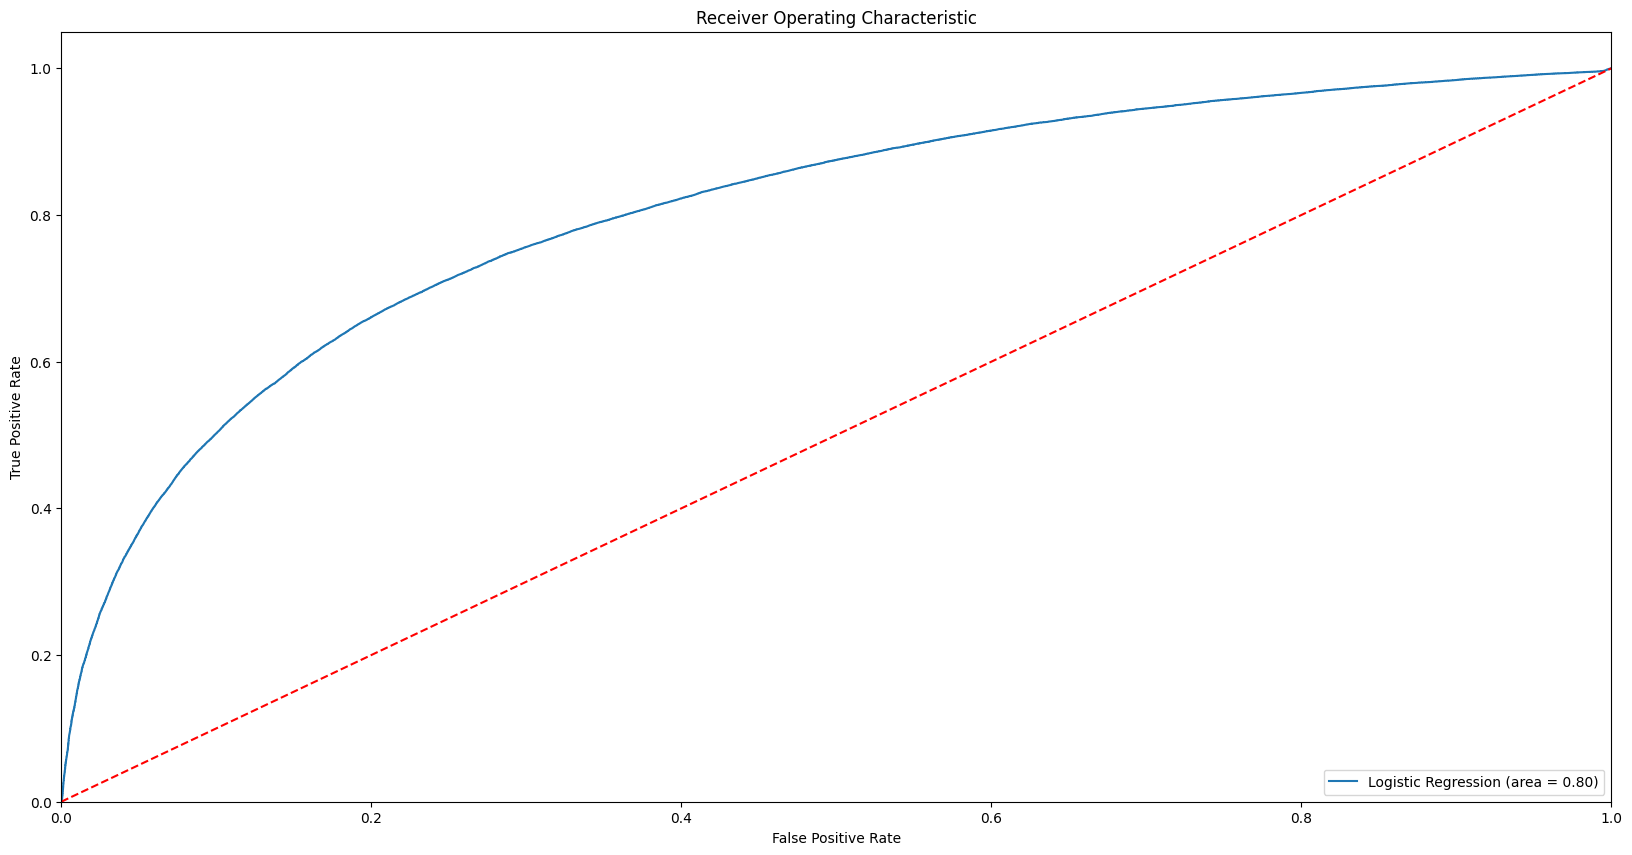

AUC: 0.803


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('AUC: %.3f' % logit_roc_auc)

,count
MENTHLTH2,
0.0,274296
1.0,170836


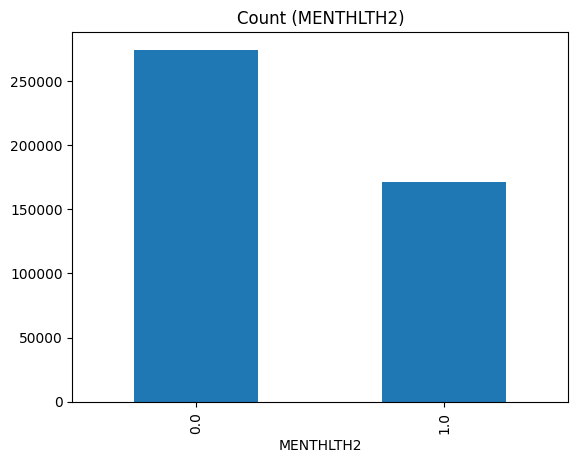

In [ ]:
MHPD2.MENTHLTH2.value_counts().plot(kind='bar', title='Count (MENTHLTH2)');
MHPD2['MENTHLTH2'].value_counts()

UNDERSAMPLING

Random under-sampling:
MENTHLTH2
0.0    170836
1.0    170836
Name: count, dtype: int64
(341672, 41)


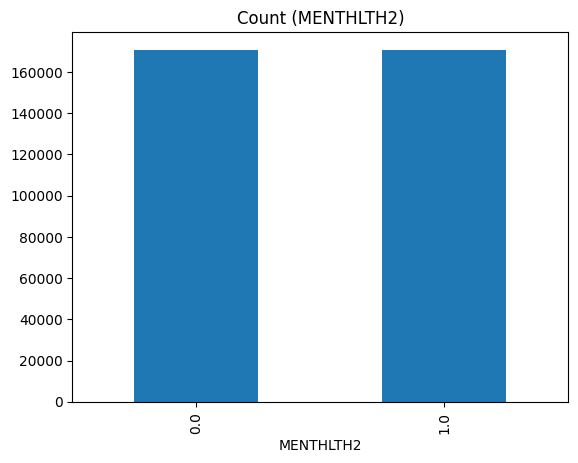

In [ ]:

count_class_0, count_class_1 = MHPD2.MENTHLTH2.value_counts()


Good_MH = MHPD2[MHPD2['MENTHLTH2'] == 0]
Poor_MH = MHPD2[MHPD2['MENTHLTH2'] == 1]

Good_MH_under = Good_MH.sample(count_class_1)
MHPD2_under = pd.concat([Good_MH_under, Poor_MH], axis=0)

print('Random under-sampling:')
print(MHPD2_under.MENTHLTH2.value_counts())
print(MHPD2_under.shape)

MHPD2_under.MENTHLTH2.value_counts().plot(kind='bar', title='Count (MENTHLTH2)');

In [ ]:
MHPD2_under.describe()

,_STATE,_SEX,_AGE_G,_BMI5CAT,MARITAL,CHILDREN,_EDUCAG,_INCOMG1,EMPLOY1,RENTHOM1,GENHLTH,PHYSHLTH,MENTHLTH,ADDEPEV3,POORHLTH,CHECKUP1,SLEPTIM1,_RFHLTH,_RFDRHV8,_HLTHPLN,MEDCOST1,_SMOKER3,DRNKANY6,_DRNKWK2,ALCDAY4,EXERANY2,DECIDE,BLIND,DIFFWALK,DIABETE4,CVDSTRK3,ASTHMA3,CHCSCNC1,CHCCOPD3,CHCKDNY2,HAVARTH4,_HCVU652,VETERAN3,LSATISFY,EMTSUPRT,MENTHLTH2
count,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,3.416720e+05,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000,341672.000000
mean,30.991103,1.542784,4.282584,3.007539,2.476723,66.300952,3.093019,5.364180,3.761230,1.436407,2.623074,56.803870,5.593435,1.795146,63.960064,1.462757,7.831897,1.213948,1.936691,1.368953,1.925709,3.814339,2.221209,1.120383e+04,545.701954,1.256641,1.911778,1.965880,1.864595,2.753550,1.975184,1.861259,1.959722,1.942740,1.976893,1.689673,4.072265,1.907121,1.847576,1.576386,0.500000
std,16.617878,0.498167,1.636753,0.794488,1.848995,37.537968,1.034518,2.370476,2.890975,0.921935,1.090917,38.121275,9.111130,0.635544,35.985525,1.132820,7.976258,0.558200,2.487015,1.563751,0.449600,1.749199,2.294767,3.109773e+04,357.500041,0.529960,0.610221,0.429521,0.527754,0.753641,0.380805,0.506309,0.515330,0.471252,0.413128,0.641958,3.845843,0.497044,0.715925,1.079416,0.500001
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.397605e-79,101.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,18.000000,1.000000,3.000000,2.000000,1.000000,5.000000,2.000000,4.000000,1.000000,1.000000,2.000000,10.000000,0.000000,2.000000,20.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,5.397605e-79,202.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,30.000000,2.000000,5.000000,3.000000,2.000000,88.000000,3.000000,5.000000,2.000000,1.000000,3.000000,88.000000,0.500000,2.000000,88.000000,1.000000,7.000000,1.000000,1.000000,1.000000,2.000000,4.000000,2.000000,4.700000e+01,888.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.500000
75%,46.000000,2.000000,6.000000,4.000000,4.000000,88.000000,4.000000,7.000000,7.000000,2.000000,3.000000,88.000000,7.000000,2.000000,88.000000,1.000000,8.000000,1.000000,1.000000,1.000000,2.000000,4.000000,2.000000,5.830000e+02,888.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,9.000000,2.000000,2.000000,2.000000,1.000000
max,78.000000,2.000000,6.000000,4.000000,9.000000,99.000000,9.000000,9.000000,9.000000,9.000000,9.000000,99.000000,30.000000,9.000000,99.000000,9.000000,99.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.990000e+04,999.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000


In [ ]:
X_under = MHPD2_under[['_STATE', '_SEX', '_AGE_G', '_BMI5CAT', 'MARITAL', 'CHILDREN', '_EDUCAG', '_INCOMG1', 'EMPLOY1', 'RENTHOM1',
           'GENHLTH', 'PHYSHLTH', 'ADDEPEV3', 'POORHLTH', 'CHECKUP1', 'SLEPTIM1', '_RFHLTH', '_RFDRHV8', '_HLTHPLN',
            'MEDCOST1', '_SMOKER3', 'DRNKANY6', '_DRNKWK2', 'ALCDAY4', 'EXERANY2', 'DECIDE', 'BLIND', 'DIFFWALK',
            'DIABETE4', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNC1', 'CHCCOPD3', 'CHCKDNY2', 'HAVARTH4', '_HCVU652', 'VETERAN3', 'LSATISFY', 'EMTSUPRT']].values

y_under = MHPD2_under['MENTHLTH2'].values

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_under, y_under, test_size=0.3, random_state=0)
logreg_under = LogisticRegression(solver='liblinear')
logreg_under.fit(X_train2, y_train2)
y_pred2 = logreg_under.predict(X_test2)
probs_under = logreg_under.predict_proba(X_test2)
probs_under = probs_under[:,1]

# describes info about train and test set
print("Number of rows/columns in X_test2 dataset: ", X_test2.shape)
print("Number of rows/columns in y_test2 dataset: ", y_test2.shape)
print("Number of rows/columns in X_train2 dataset: ", X_train2.shape)
print("Number of rows/columns in y_train2 dataset: ", y_train2.shape)

Number of rows/columns in X_test2 dataset:  (102502, 39)
Number of rows/columns in y_test2 dataset:  (102502,)
Number of rows/columns in X_train2 dataset:  (239170, 39)
Number of rows/columns in y_train2 dataset:  (239170,)


In [ ]:
unique, counts = np.unique(y_train2, return_counts=True)
dict(zip(unique, counts))

{0.0: 119341, 1.0: 119829}

In [ ]:
y_pred2 = logreg_under.predict(X_test2)

print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg_under.score(X_test2, y_test2)))

Accuracy of logistic regression classifier on test set: 0.7296


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test2, y_pred2)
print(confusion_matrix)

[[39727 11768]
 [15950 35057]]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test2,y_pred2))
print(classification_report(y_test2,y_pred2))
print(accuracy_score(y_test2, y_pred2))

[[39727 11768]
 [15950 35057]]
              precision    recall  f1-score   support

         0.0       0.71      0.77      0.74     51495
         1.0       0.75      0.69      0.72     51007

    accuracy                           0.73    102502
   macro avg       0.73      0.73      0.73    102502
weighted avg       0.73      0.73      0.73    102502

0.7295857641802111


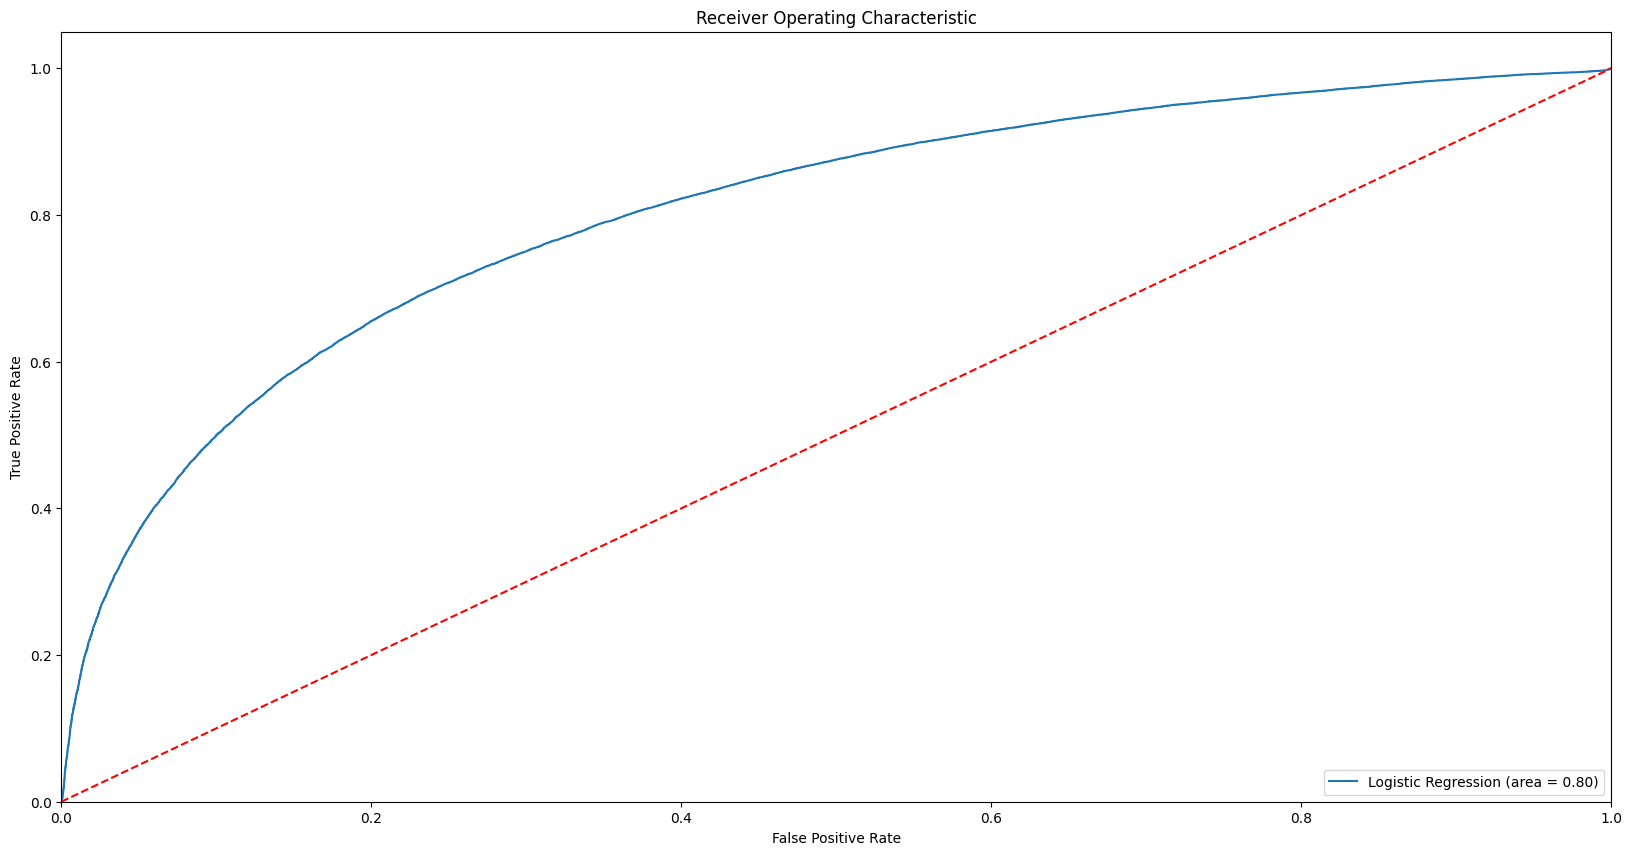

AUC: 0.802


In [ ]:
logit_roc_auc = roc_auc_score(y_test2, probs_under)
fpr, tpr, thresholds = roc_curve(y_test2, probs_under)
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('AUC: %.3f' % logit_roc_auc)

OVERSAMPLING

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# setting up testing and training sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=0)

# Using RandomOverSampler
ros = RandomOverSampler(sampling_strategy='minority', random_state=0)
X_train_over, y_train_over = ros.fit_resample(X_train3, y_train3)

# Describes info about train and test set
print("Number of rows/columns in X_test3 dataset: ", X_test3.shape)
print("Number of rows/columns in y_test3 dataset: ", y_test3.shape)
print("Number of rows/columns in X_train3 dataset: ", X_train3.shape)
print("Number of rows/columns in y_train3 dataset: ", y_train3.shape)
print("Number of rows/columns in X_train_over dataset: ", X_train_over.shape)
print("Number of rows/columns in y_train_over dataset: ", y_train_over.shape)


Number of rows/columns in X_test3 dataset:  (133540, 39)
Number of rows/columns in y_test3 dataset:  (133540,)
Number of rows/columns in X_train3 dataset:  (311592, 39)
Number of rows/columns in y_train3 dataset:  (311592,)
Number of rows/columns in X_train_over dataset:  (384146, 39)
Number of rows/columns in y_train_over dataset:  (384146,)


In [ ]:
unique, counts = np.unique(y_train3, return_counts=True)
dict(zip(unique, counts))

{0.0: 192073, 1.0: 119519}

In [ ]:
unique, counts = np.unique(y_train_over, return_counts=True)
dict(zip(unique, counts))

{0.0: 192073, 1.0: 192073}

In [ ]:
log_smote = LogisticRegression(solver='liblinear')
log_smote.fit(X_train_over, y_train_over)
smote_pred = log_smote.predict(X_test3)
smote_probs = log_smote.predict_proba(X_test3)
smote_probs = smote_probs[:,1]

In [ ]:
print(confusion_matrix(y_test3,smote_pred))
print(classification_report(y_test3,smote_pred))
print(accuracy_score(y_test3, smote_pred))

[[63984 18239]
 [16234 35083]]
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79     82223
         1.0       0.66      0.68      0.67     51317

    accuracy                           0.74    133540
   macro avg       0.73      0.73      0.73    133540
weighted avg       0.74      0.74      0.74    133540

0.7418526284259398


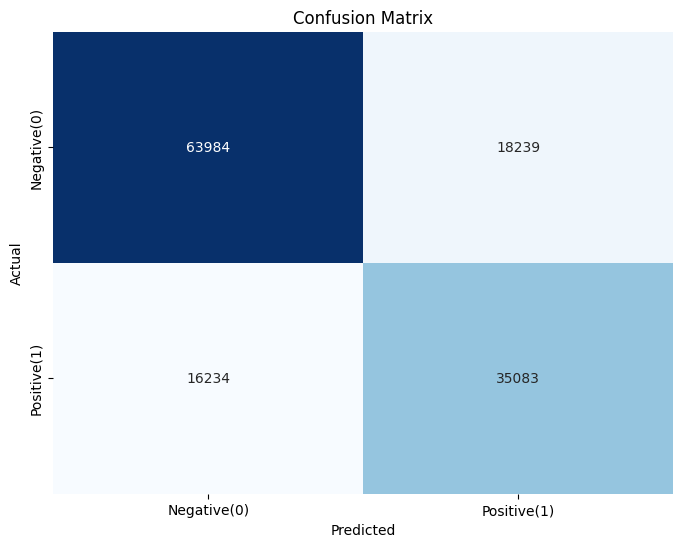

In [ ]:
cm = confusion_matrix(y_test3, smote_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative(0)', 'Positive(1)'],
            yticklabels=['Negative(0)', 'Positive(1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

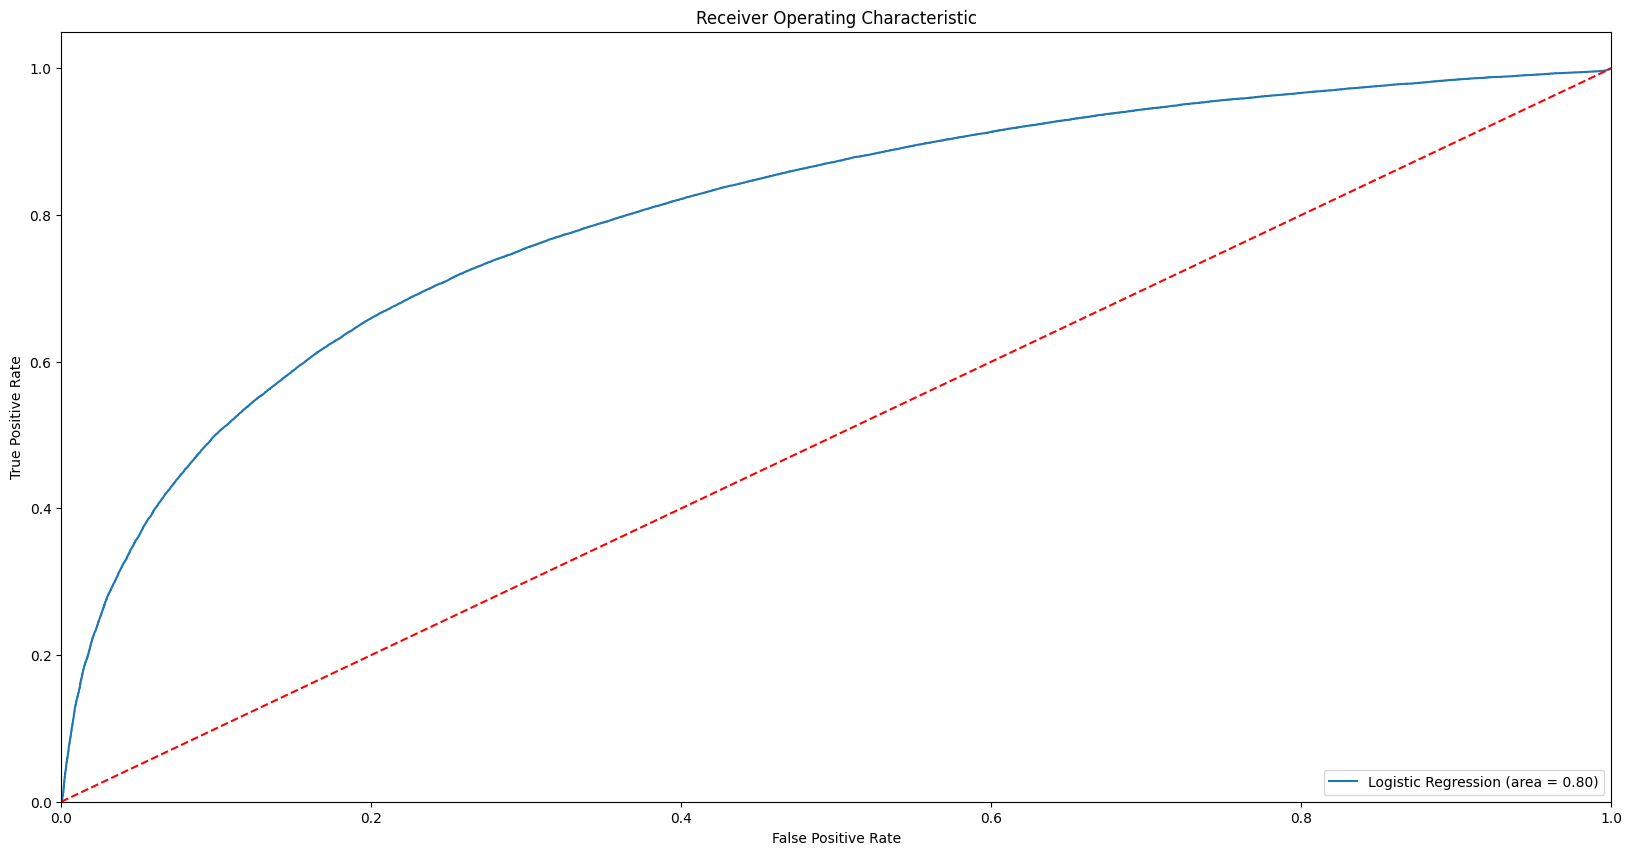

AUC: 0.802


In [ ]:
logit_roc_auc = roc_auc_score(y_test3, smote_probs)
fpr, tpr, thresholds = roc_curve(y_test3, smote_probs)
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('AUC: %.3f' % logit_roc_auc)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 16.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/shap/explainers/_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


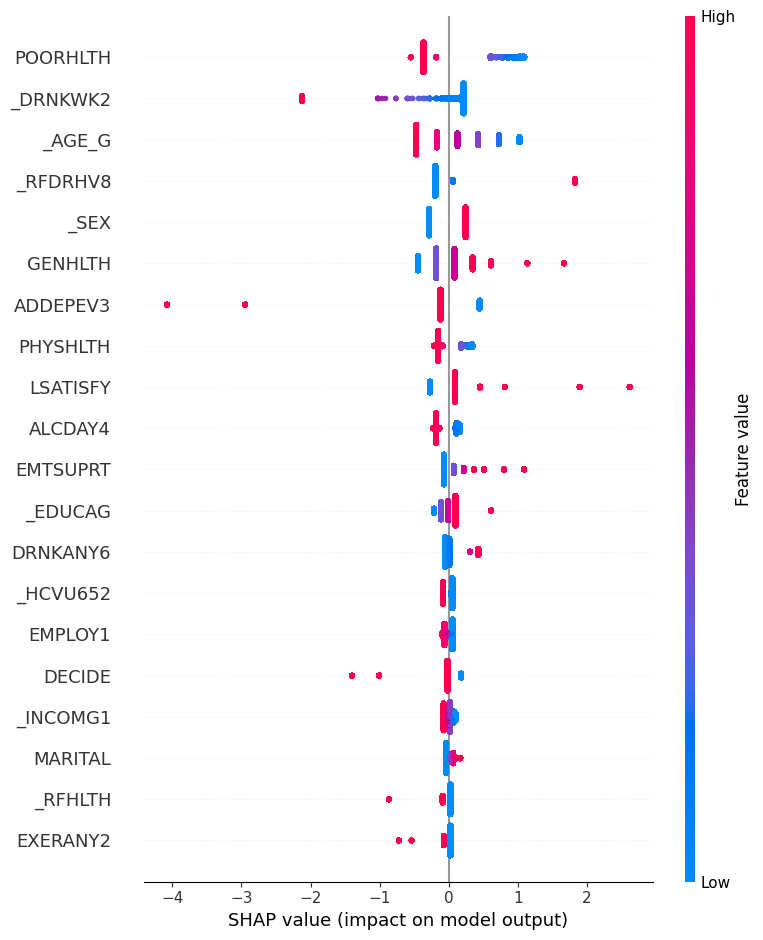

In [ ]:
!pip install shap
import shap
explainer = shap.LinearExplainer(logreg, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)
feature_names = MHPD2[['_STATE', '_SEX', '_AGE_G', '_BMI5CAT', 'MARITAL', 'CHILDREN', '_EDUCAG', '_INCOMG1', 'EMPLOY1', 'RENTHOM1',
'GENHLTH', 'PHYSHLTH', 'ADDEPEV3', 'POORHLTH', 'CHECKUP1', 'SLEPTIM1', '_RFHLTH', '_RFDRHV8', '_HLTHPLN',
            'MEDCOST1', '_SMOKER3', 'DRNKANY6', '_DRNKWK2', 'ALCDAY4', 'EXERANY2', 'DECIDE', 'BLIND', 'DIFFWALK',
            'DIABETE4', 'CVDSTRK3', 'ASTHMA3', 'CHCSCNC1', 'CHCCOPD3', 'CHCKDNY2', 'HAVARTH4', '_HCVU652', 'VETERAN3', 'LSATISFY', 'EMTSUPRT']].columns

shap.summary_plot(shap_values, X_test, feature_names=feature_names)

Decision Tree

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
dt_original = DecisionTreeClassifier(random_state=0)
dt_original.fit(X_train, y_train)
dt_pred_original = dt_original.predict(X_test)
dt_probs_original = dt_original.predict_proba(X_test)[:, 1]

print("Decision Tree - Original Data:")
print(confusion_matrix(y_test, dt_pred_original))
print(classification_report(y_test, dt_pred_original))
print("Accuracy:", accuracy_score(y_test, dt_pred_original))

Decision Tree - Original Data:
[[60434 21789]
 [20015 31302]]
              precision    recall  f1-score   support

         0.0       0.75      0.74      0.74     82223
         1.0       0.59      0.61      0.60     51317

    accuracy                           0.69    133540
   macro avg       0.67      0.67      0.67    133540
weighted avg       0.69      0.69      0.69    133540

Accuracy: 0.6869552194099147


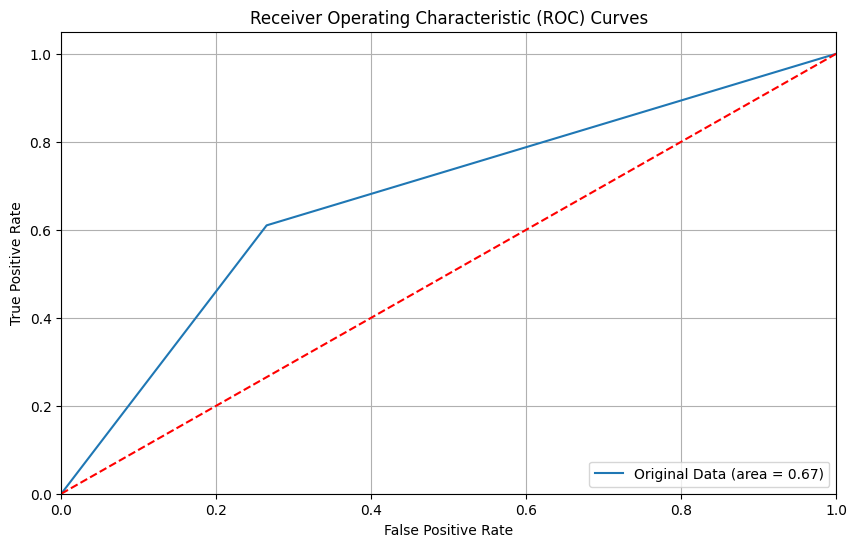

In [ ]:
plt.figure(figsize=(10, 6))
roc_auc_original = roc_auc_score(y_test, dt_probs_original)
fpr_original, tpr_original, _ = roc_curve(y_test, dt_probs_original)
plt.plot(fpr_original, tpr_original, label='Original Data (area = %0.2f)' % roc_auc_original)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Undersampling

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=0)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

In [ ]:
dt_under = DecisionTreeClassifier(random_state=0)
dt_under.fit(X_train_under, y_train_under)
dt_pred_under = dt_under.predict(X_test)
dt_probs_under = dt_under.predict_proba(X_test)[:, 1]

print("\nDecision Tree - Undersampled Data:")
print(confusion_matrix(y_test, dt_pred_under))
print(classification_report(y_test, dt_pred_under))
print("Accuracy:", accuracy_score(y_test, dt_pred_under))


Decision Tree - Undersampled Data:
[[54609 27614]
 [16947 34370]]
              precision    recall  f1-score   support

         0.0       0.76      0.66      0.71     82223
         1.0       0.55      0.67      0.61     51317

    accuracy                           0.67    133540
   macro avg       0.66      0.67      0.66    133540
weighted avg       0.68      0.67      0.67    133540

Accuracy: 0.6663097199341022


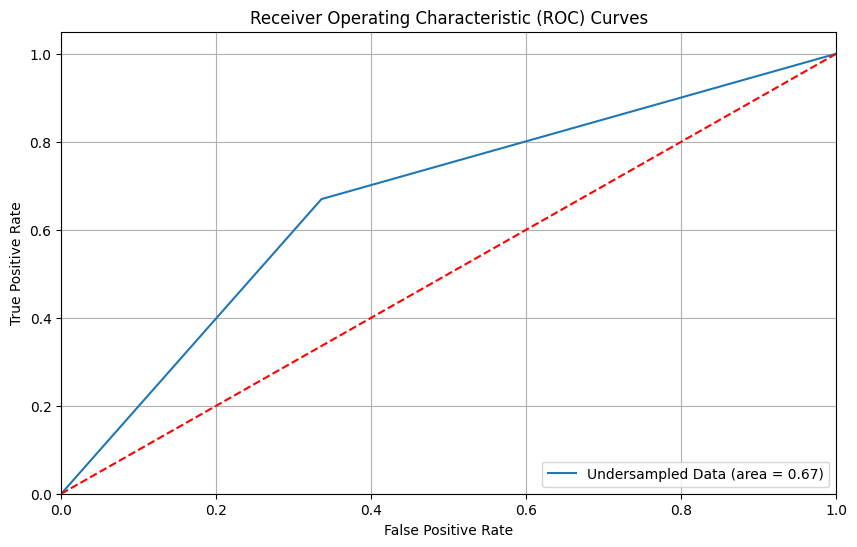

In [ ]:
plt.figure(figsize=(10, 6))
roc_auc_under = roc_auc_score(y_test, dt_probs_under)
fpr_under, tpr_under, _ = roc_curve(y_test, dt_probs_under)
plt.plot(fpr_under, tpr_under, label='Undersampled Data (area = %0.2f)' % roc_auc_under)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Oversampling

In [ ]:
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=0)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

In [ ]:
dt_over = DecisionTreeClassifier(random_state=0)
dt_over.fit(X_train_over, y_train_over)
dt_pred_over = dt_over.predict(X_test)
dt_probs_over = dt_over.predict_proba(X_test)[:, 1]

print("\nDecision Tree - Oversampled Data:")
print(confusion_matrix(y_test, dt_pred_over))
print(classification_report(y_test, dt_pred_over))
print("Accuracy:", accuracy_score(y_test, dt_pred_over))


Decision Tree - Oversampled Data:
[[60832 21391]
 [20238 31079]]
              precision    recall  f1-score   support

         0.0       0.75      0.74      0.75     82223
         1.0       0.59      0.61      0.60     51317

    accuracy                           0.69    133540
   macro avg       0.67      0.67      0.67    133540
weighted avg       0.69      0.69      0.69    133540

Accuracy: 0.6882656881833159


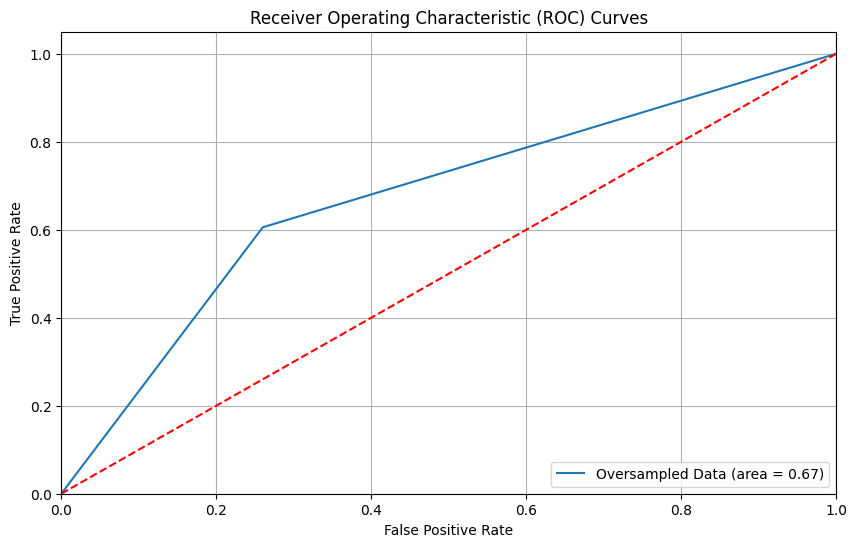

In [ ]:
plt.figure(figsize=(10, 6))
roc_auc_over = roc_auc_score(y_test, dt_probs_over)
fpr_over, tpr_over, _ = roc_curve(y_test, dt_probs_over)
plt.plot(fpr_over, tpr_over, label='Oversampled Data (area = %0.2f)' % roc_auc_over)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Hyperparameter Tuning

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# setting up testing and training sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=0)

# Using RandomOverSampler
ros = RandomOverSampler(sampling_strategy='minority', random_state=0)
X_train_over, y_train_over = ros.fit_resample(X_train3, y_train3)

# Describes info about train and test set
print("Number of rows/columns in X_test3 dataset: ", X_test3.shape)
print("Number of rows/columns in y_test3 dataset: ", y_test3.shape)
print("Number of rows/columns in X_train3 dataset: ", X_train3.shape)
print("Number of rows/columns in y_train3 dataset: ", y_train3.shape)
print("Number of rows/columns in X_train_over dataset: ", X_train_over.shape)
print("Number of rows/columns in y_train_over dataset: ", y_train_over.shape)

Number of rows/columns in X_test3 dataset:  (133540, 39)
Number of rows/columns in y_test3 dataset:  (133540,)
Number of rows/columns in X_train3 dataset:  (311592, 39)
Number of rows/columns in y_train3 dataset:  (311592,)
Number of rows/columns in X_train_over dataset:  (384146, 39)
Number of rows/columns in y_train_over dataset:  (384146,)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter space
param_dist = {
    'penalty': ['l1', 'l2'],
    'C': stats.uniform(0.01, 10),  # Continuous uniform distribution for C
    'solver': ['liblinear', 'saga']  # Solvers that support both penalties
}

In [ ]:
# Create a logistic regression model
logreg = LogisticRegression()
random_search = RandomizedSearchCV(
    estimator=logreg,
    param_distributions=param_dist,
    n_iter=50,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    random_state=0,
    n_jobs=-1
)

In [ ]:
# Perform random search on the oversampled training data
random_search.fit(X_train_over, y_train_over)
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [ ]:
# Train a model with the best hyperparameters
best_logreg = LogisticRegression(**best_params)
best_logreg.fit(X_train_over, y_train_over)
y_pred_best = best_logreg.predict(X_test3)
y_probs_best = best_logreg.predict_proba(X_test3)[:, 1]

In [ ]:
# Evaluate the model
print("\nLogistic Regression - Oversampled Data with Hyperparameter Tuning:")
print(confusion_matrix(y_test3, y_pred_best))
print(classification_report(y_test3, y_pred_best))
print("Accuracy:", accuracy_score(y_test3, y_pred_best))

In [ ]:
# Plot ROC curve
plt.figure(figsize=(10, 6))
roc_auc_best = roc_auc_score(y_test3, y_probs_best)
fpr_best, tpr_best, _ = roc_curve(y_test3, y_probs_best)
plt.plot(fpr_best, tpr_best, label='Oversampled Data (area = %0.2f)' % roc_auc_best)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()